In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline



In [1]:
training_dir_mal = r"C:\Users\siddh\Downloads\Image\train\MaliciousImages"
training_list_mal = []

for d in tqdm(os.listdir(training_dir_mal)):
    if d == '_DS_Store':
        continue
    path = training_dir_mal+'/'+d
    image = Image.open(path).resize((200, 200)).convert('L')
    pixels = np.asarray(image).astype('float64')
    pixels /= 255
    training_list_mal.append(pixels)

NameError: name 'tqdm' is not defined

In [22]:
training_dir_nor = r"C:\Users\siddh\Downloads\Image\train\NormalImages"
training_list_nor = []

for c in tqdm(os.listdir(training_dir_nor)):
    if c == '_DS_Store':
        continue
    path = training_dir_nor+'/'+c
    image = Image.open(path).resize((200, 200)).convert('L')
    pixels = np.asarray(image).astype('float64')
    pixels /= 255
    training_list_nor.append(pixels)

100%|██████████| 9142/9142 [03:13<00:00, 47.20it/s]


In [23]:
test_dir_mal = r"C:\Users\siddh\Downloads\Image\test\MaliciousImages"
test_list_mal = []

for d in tqdm(os.listdir(test_dir_mal)):
    if d == '_DS_Store':
        continue
    path = test_dir_mal+'/'+d
    image = Image.open(path).resize((200, 200)).convert('L')
    pixels = np.asarray(image).astype('float64')
    pixels /= 255
    test_list_mal.append(pixels)

100%|██████████| 2980/2980 [00:58<00:00, 51.36it/s]


In [24]:
test_dir_nor = r"C:\Users\siddh\Downloads\Image\test\NormalImages"
test_list_nor = []

for c in tqdm(os.listdir(test_dir_nor)):
    if c == '_DS_Store':
        continue
    path = test_dir_cats+'/'+c
    image = Image.open(path).resize((200, 200)).convert('L')
    pixels = np.asarray(image).astype('float64')
    pixels /= 255
    test_list_nor.append(pixels)

100%|██████████| 3048/3048 [01:00<00:00, 50.46it/s]


In [25]:
X_train = np.array([*training_list_mal, *training_list_nor])
train_y_label_mal = np.zeros((len(training_list_mal), 1)) # mal labeled as 0
train_y_label_nor = np.ones((len(training_list_nor), 1)) # nor labeled as 1
y_train = np.concatenate((train_y_label_mal, train_y_label_nor))

In [26]:
X_test = np.array([*test_list_mal, *test_list_nor])
test_y_label_mal = np.zeros((len(test_list_mal), 1)) # mal labeled as 0
test_y_label_nor = np.ones((len(test_list_nor), 1)) # nor labeled as 1
y_test = np.concatenate((test_y_label_mal, test_y_label_nor))

In [27]:
del training_list_mal
del training_list_nor
del test_list_mal
del test_list_nor

In [28]:
# One-hot encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [29]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [30]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (18081, 200, 200)
y_train shape: (18081, 2)
X_test shape: (6028, 200, 200)
y_test shape: (6028, 2)


In [31]:
X_train = X_train.reshape(-1, 200, 200, 1)
X_test = X_test.reshape(-1, 200, 200, 1)
print("X_train reshaped:", X_train.shape)
print("X_test reshaped:",X_test.shape)

X_train reshaped: (18081, 200, 200, 1)
X_test reshaped: (6028, 200, 200, 1)


In [32]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 31)
print("X_train shape:",X_train.shape)
print("X_validation shape:",X_val.shape)
print("Y_train shape:",Y_train.shape)
print("Y_validation shape:",Y_val.shape)

X_train shape: (14464, 200, 200, 1)
X_validation shape: (3617, 200, 200, 1)
Y_train shape: (14464, 2)
Y_validation shape: (3617, 2)


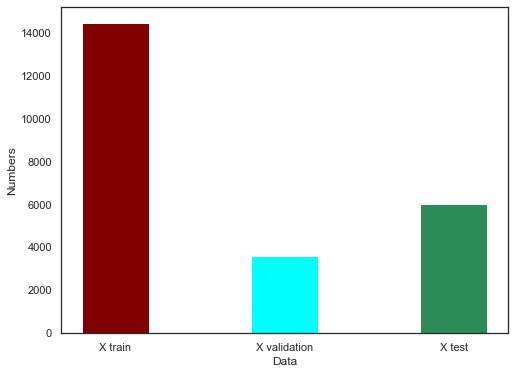

In [33]:
plt.figure(figsize=(8,6))
plt.bar(["X train", "X validation", "X test"], [X_train.shape[0], X_val.shape[0], X_test.shape[0]], color=["maroon", "cyan", "seagreen"], width=0.4)
plt.xlabel("Data")
plt.ylabel("Numbers")
plt.show()

In [35]:
from keras import regularizers

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(200, 200, 1)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9))
model.add(MaxPool2D(pool_size=(3,3), strides=3))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9))
model.add(MaxPool2D(pool_size=(3,3), strides=3))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9))
model.add(MaxPool2D(pool_size=(3,3), strides=3))
#model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9))
#model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 66, 66, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 66, 66, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 66, 66, 64)       256       
 hNormalization)                                                 
                                                      

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True,expand_nested = True,dpi = 80)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [38]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.01, max_lr=0.07, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())
        

In [40]:
epoch = 9
batch_size = 64

In [41]:
clr_triangular = CyclicLR(base_lr=0.02, mode='triangular', step_size=(8*epoch))
#optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
optimizer = SGD(lr=0.02, momentum=0.9, decay=0.01, nesterov=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', min_lr=0.001, verbose=1, cooldown=1)
early_stop = EarlyStopping(monitor='val_accuracy', verbose=1, mode='max', patience=20)

In [42]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [44]:
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy", "mean_absolute_error", f1_m, precision_m, recall_m, tf.keras.metrics.AUC()])

In [45]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    #shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode='nearest',
    #horizontal_flip = True,
    vertical_flip = True)

    

In [46]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size), epochs=epoch, callbacks=[clr_triangular, reduce_lr, early_stop], verbose=1, validation_data=(X_val, Y_val))

Epoch 1/9
226/226 [==============================] - 524s 2s/step - loss: 0.7341 - accuracy: 0.9205 - mean_absolute_error: 0.1341 - f1_m: 0.9188 - precision_m: 0.9188 - recall_m: 0.9190 - auc: 0.9664 - val_loss: 0.8774 - val_accuracy: 0.8504 - val_mean_absolute_error: 0.2078 - val_f1_m: 0.8504 - val_precision_m: 0.8529 - val_recall_m: 0.8481 - val_auc: 0.9070 - lr: 0.0631
Epoch 2/9
226/226 [==============================] - 487s 2s/step - loss: 0.6168 - accuracy: 0.9398 - mean_absolute_error: 0.0972 - f1_m: 0.9399 - precision_m: 0.9389 - recall_m: 0.9409 - auc: 0.9802 - val_loss: 0.6441 - val_accuracy: 0.9229 - val_mean_absolute_error: 0.1076 - val_f1_m: 0.9295 - val_precision_m: 0.9181 - val_recall_m: 0.9416 - val_auc: 0.9674 - lr: 0.0339
Epoch 3/9
226/226 [==============================] - 483s 2s/step - loss: 0.5610 - accuracy: 0.9484 - mean_absolute_error: 0.0838 - f1_m: 0.9491 - precision_m: 0.9485 - recall_m: 0.9497 - auc: 0.9855 - val_loss: 0.5589 - val_accuracy: 0.9461 - val_me

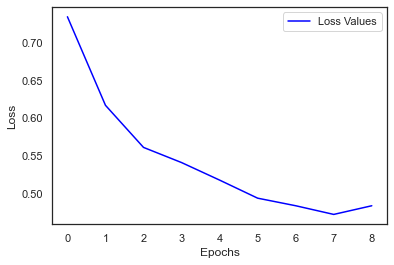

In [47]:
plt.plot(history.history["loss"], color="blue", label="Loss Values")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

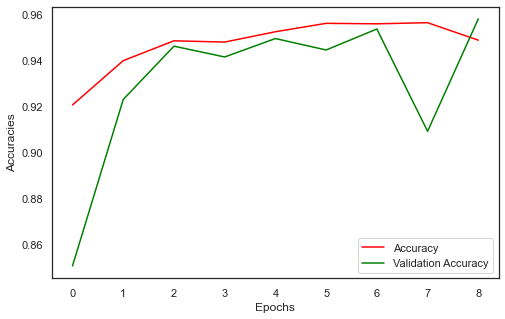

In [48]:
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"], color="red", label="Accuracy")
plt.plot(history.history["val_accuracy"], color="green", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (65,) and (9,)

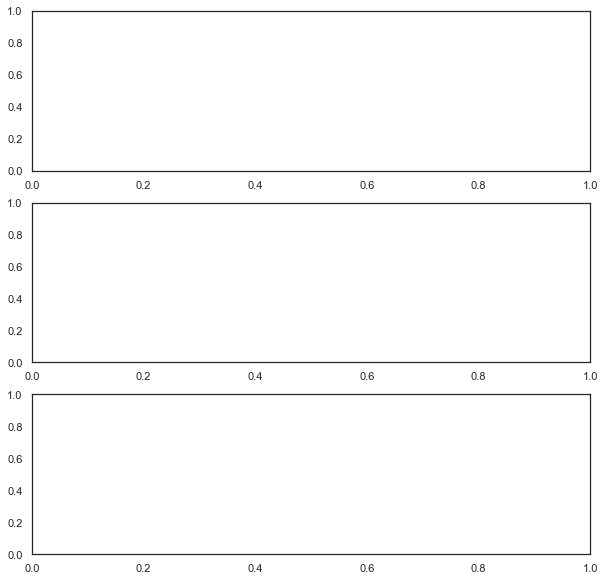

In [49]:
fig = plt.figure(1, figsize=(10,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
xx = list(range(1,65+1))
ax1.plot(xx, history.history["f1_m"], color="b", label="F1 score")
ax1.xaxis.set_ticks(list(range(0,65+1, 5)))
ax1.yaxis.set_ticks(list(np.arange(0.55, 0.80, 0.05)))
ax1.legend()

ax2.plot(xx, history.history["precision_m"], color="g", label="Precision")
ax2.xaxis.set_ticks(list(range(0,65+1, 5)))
ax2.yaxis.set_ticks(list(np.arange(0.55, 0.80, 0.05)))
ax2.legend()

ax3.plot(xx, history.history["recall_m"], color="r", label="Recall")
ax3.xaxis.set_ticks(list(range(0,65+1,5)))
ax3.yaxis.set_ticks(list(np.arange(0.55, 0.80, 0.05)))
ax3.legend()

fig.supxlabel('Epochs')
fig.supylabel('Scores')
plt.show()

In [50]:
score = model.evaluate(X_test, y_test, verbose=0)

In [51]:
print('Test loss:', round(score[0], 3)) 
print('Test accuracy:', round(score[1], 3))
print('Test MAE:', round(score[2], 3))
print('F1 score:', round(score[3], 3))
print('Precision:', round(score[4], 3))
print('Recall:', round(score[5], 3))
print("AUC:", round(score[6], 3))

Test loss: 0.489
Test accuracy: 0.953
Test MAE: 0.064
F1 score: 0.953
Precision: 0.953
Recall: 0.954
AUC: 0.984


In [52]:
y_pred = model.predict(X_test)

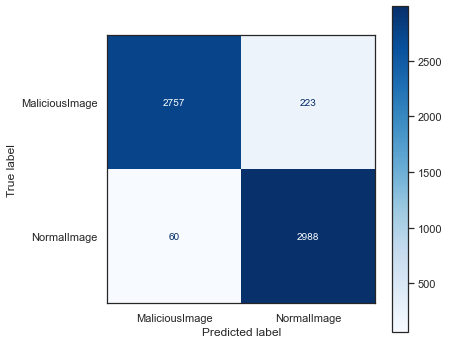

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(y_test,axis = 1), np.argmax(y_pred,axis = 1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["MaliciousImage", "NormalImage"])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()